In [2]:
import scipy
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [3]:
# Set random seed for reproducibility
tf.random.set_seed(1234)

In [10]:
d1 = pd.read_csv('station_day.csv', parse_dates=['Date'], index_col='Date')
file = pd.read_csv('station_day.csv', index_col = 'StationId')

In [13]:
c = d1.loc[:, ['AQI']]

In [15]:
c['AQI']

Date
2017-11-24      NaN
2017-11-25    184.0
2017-11-26    197.0
2017-11-27    198.0
2017-11-28    188.0
              ...  
2020-06-27     50.0
2020-06-28     65.0
2020-06-29     63.0
2020-06-30     57.0
2020-07-01     59.0
Name: AQI, Length: 108035, dtype: float64

In [6]:
f = file[:count].copy()
f.index = f['Date']
f

NameError: name 'count' is not defined

In [7]:
def sort_by_station(dframe, station):
    dframe = dframe.sort_index()
    count = list(dframe.index).count(station)
    start = list(dframe.index).index(station)
    print(count, start)
    new_frame = dframe[start:start + count].copy()
    new_frame.index = new_frame['Date']
    return new_frame

In [8]:
f.drop(['AQI_Bucket', 'Date'], axis = 1, inplace = True)

NameError: name 'f' is not defined

In [ ]:
df = f.sort_index()
df.info()

In [ ]:
timeseries(f.index, f['AQI'], 'Time (day)', 'AQI')

sorting stn  1  of  110
951 0
plotting...


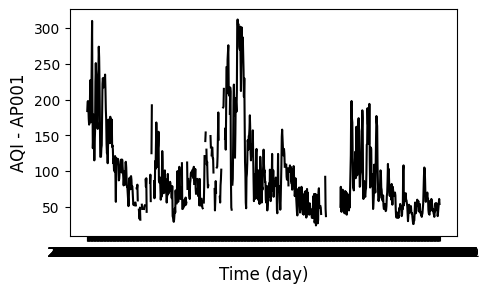

sorting stn  2  of  110
1462 951
plotting...


KeyboardInterrupt: 

In [9]:
cols = []

def timeseries (x_axis, y_axis, x_label, y_label):
    plt.figure(figsize = (5, 3),dpi=100)
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12})
    plt.ylabel(y_label, {'fontsize': 12})
    plt.show()
    #plt.savefig('C:/Users/Bowen-Research/Desktop/Olaniran_Oyetade_Olapade Research/Olapade codes/Sample guide/6.jpg', format='jpg', dpi=1000)

stations = file.index.unique()
i = 0
for stn in stations:
    print('sorting stn ', i+1, ' of ', len(stations))
    frame = sort_by_station(file, stn)
    print('plotting...')
    timeseries(frame.index, frame['AQI'], 'Time (day)', 'AQI - ' + stn)
    i += 1

In [39]:
frame.index

Index([], dtype='object', name='Date')

In [30]:
for col in df.columns:
    if df[col].isnull().any():
        df[col].fillna(value= df[col].mean(), inplace = True)

In [31]:
# Outlier detection
#up_b = df['Refractivity_Index'].mean() + 2*df['Refractivity_Index'].std()
#low_b = df['Refractivity_Index'].mean() - 2*df['Refractivity_Index'].std()

# Replace outlier by interpolation for base consumption
#df.loc[df['Refractivity_Index'] > up_b, 'Refractivity_Index'] = np.nan
#df.loc[df['Refractivity_Index'] < low_b, 'Refractivity_Index'] = np.nan
#df['Refractivity_Index'].interpolate(inplace=True)

In [32]:
train_size = int(len(df)*0.8)
train_dataset, test_dataset = df.iloc[:train_size], df.iloc[train_size:]

In [60]:
# Split train data to X and y
X_train = train_dataset.drop('AQI', axis = 1)
y_train = train_dataset.loc[:,['AQI']]

# Split test data to X and y
X_test = test_dataset.drop('AQI', axis = 1)
y_test = test_dataset.loc[:,['AQI']]

In [61]:
# Transform X_train, y_train, X_test and y_test

# Different scaler for input and output
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

# Apply the scaler to training data
train_x_norm = input_scaler.transform(X_train)
train_y_norm = output_scaler.transform(y_train)

# Apply the scaler to test data
test_x_norm = input_scaler.transform(X_test)
test_y_norm = output_scaler.transform(y_test)

In [62]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
        
    return np.array(Xs), np.array(ys)


TIME_STEPS = 30

X_test, y_test = create_dataset(test_x_norm, test_y_norm, TIME_STEPS)
X_train, y_train = create_dataset(train_x_norm, train_y_norm, TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_train.shape)

X_train.shape:  (161, 30, 12)
y_train.shape:  (730, 1)
X_test.shape:  (161, 30, 12)
y_test.shape:  (730, 1)


In [63]:
# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    # First layer of LSTM
    model.add(m (units = 100, return_sequences = True, 
                 input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    
    # Second layer of LSTM
    #model.add(m (units = units, return_sequences = True))                 
    #model.add(Dropout(0.2))
    
    # Third layer of LSTM
    #model.add(m (units = units, return_sequences = True))                 
    #model.add(Dropout(0.2))
    
    # Fourth layer of LSTM
    #model.add(m (units = units, return_sequences = True))                 
    #model.add(Dropout(0.2))
    
    # Fifth layer of LSTM
    model.add(m (units = units))                 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    return model

In [64]:
model_lstm = create_model(64, LSTM)

In [65]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 15)

    # shuffle = False because the order of the data matters
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,
                    batch_size = 32, shuffle = False, callbacks = [early_stop])
    return history

In [66]:
history_lstm = fit_model(model_lstm)

Epoch 1/100
19/19 [==============================] - 24s 477ms/step - loss: 0.0550 - accuracy: 0.0000e+00 - val_loss: 0.0135 - val_accuracy: 0.0068
Epoch 2/100
19/19 [==============================] - 6s 290ms/step - loss: 0.0186 - accuracy: 0.0000e+00 - val_loss: 0.0116 - val_accuracy: 0.0068
Epoch 3/100
19/19 [==============================] - 5s 286ms/step - loss: 0.0177 - accuracy: 0.0017 - val_loss: 0.0115 - val_accuracy: 0.0068
Epoch 4/100
19/19 [==============================] - 6s 296ms/step - loss: 0.0171 - accuracy: 0.0000e+00 - val_loss: 0.0120 - val_accuracy: 0.0068
Epoch 5/100
19/19 [==============================] - 6s 295ms/step - loss: 0.0156 - accuracy: 0.0000e+00 - val_loss: 0.0111 - val_accuracy: 0.0068
Epoch 6/100
19/19 [==============================] - 6s 289ms/step - loss: 0.0177 - accuracy: 0.0017 - val_loss: 0.0185 - val_accuracy: 0.0068
Epoch 7/100
19/19 [==============================] - 6s 294ms/step - loss: 0.0174 - accuracy: 0.0017 - val_loss: 0.0107 - val

Epoch 58/100
19/19 [==============================] - 5s 284ms/step - loss: 0.0069 - accuracy: 0.0017 - val_loss: 0.0051 - val_accuracy: 0.0068
Epoch 59/100
19/19 [==============================] - 5s 287ms/step - loss: 0.0074 - accuracy: 0.0017 - val_loss: 0.0062 - val_accuracy: 0.0068
Epoch 60/100
19/19 [==============================] - 6s 301ms/step - loss: 0.0110 - accuracy: 0.0017 - val_loss: 0.0061 - val_accuracy: 0.0068
Epoch 61/100
19/19 [==============================] - 6s 293ms/step - loss: 0.0077 - accuracy: 0.0017 - val_loss: 0.0058 - val_accuracy: 0.0068
Epoch 62/100
19/19 [==============================] - 6s 291ms/step - loss: 0.0076 - accuracy: 0.0017 - val_loss: 0.0048 - val_accuracy: 0.0068
Epoch 63/100
19/19 [==============================] - 5s 284ms/step - loss: 0.0070 - accuracy: 0.0017 - val_loss: 0.0057 - val_accuracy: 0.0068
Epoch 64/100
19/19 [==============================] - 6s 290ms/step - loss: 0.0076 - accuracy: 0.0017 - val_loss: 0.0050 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


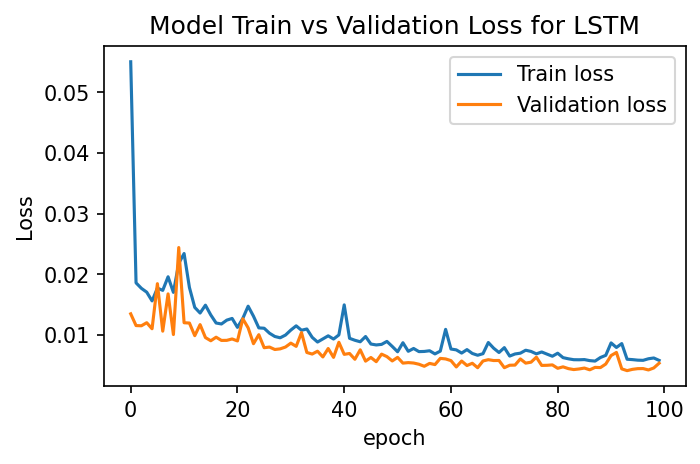

In [67]:
def plot_loss (history, model_name):
    plt.figure(figsize = (5, 3), dpi=150)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    print(history.history.keys())

plot_loss (history_lstm, 'LSTM')

In [68]:
# Note that I have to use scaler_y
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

In [69]:
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction

prediction_lstm = prediction(model_lstm)

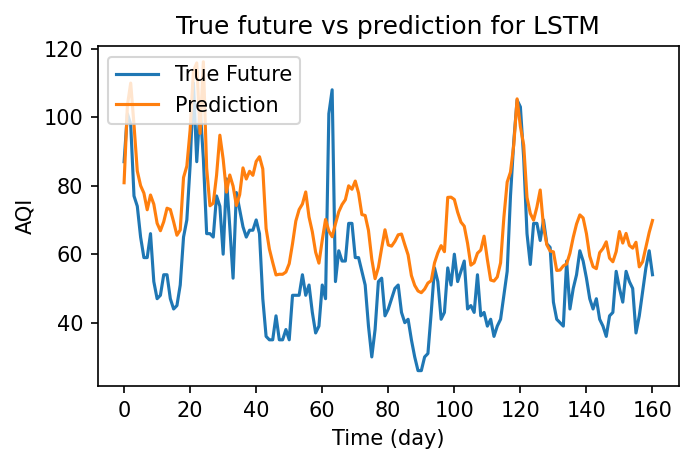

In [70]:
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(5, 3), dpi=150)
    
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(y_test), label='True Future')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('True future vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('AQI')
    
plot_future(prediction_lstm, 'LSTM', y_test)

In [71]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    
    R_square = r2_score(actual, predictions)

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('Coefficient of Determination: {:.4f}'.format(R_square))
    print('')
    
evaluate_prediction(prediction_lstm, y_test, 'LSTM')

LSTM:
Mean Absolute Error: 16.0630
Root Mean Square Error: 17.8296
Coefficient of Determination: -0.0485

